# Alumno: Gerardo de Miguel González

## Ejercicio de regularización

 1. Escribe una función de R que reciba como input un vector "x" con la variable dependiente, un vector de parámetros "betas" que contenga los coeficientes de un polinomio y una sigma "sigma"; y que devuelva el vector dependiente que siga la ley polinomial dada con PDF gaussiana y sigma dada.  

In [1]:
#::GMG::Algoritmo de Horner vectorizado para hallar el valor de un polinomio
#       x: variable independiente
#       v: vector de coeficientes en x^0, x^1, ..., x^p
horner <- function(x, v) {
  Reduce(v, right=T, f=function(a, b) {
    b * x + a
  })
}

In [2]:
#::GMG::Función que genera el polinomio junto con un ruido distribuido
#       N(0,sigma)
pol <- function (x,betas,sigma) {
    return(horner(x,betas) + rnorm(length(x),0,sigma))
}

 2. Construye un vector de 40 elementos distribuido uniformemente entre [-3, 3]. Úsalo con la función anterior, el polinomio: $x^3 + 2 x^2 - x - 2$ y $\sigma = 4$. Representa los datos resultantes.

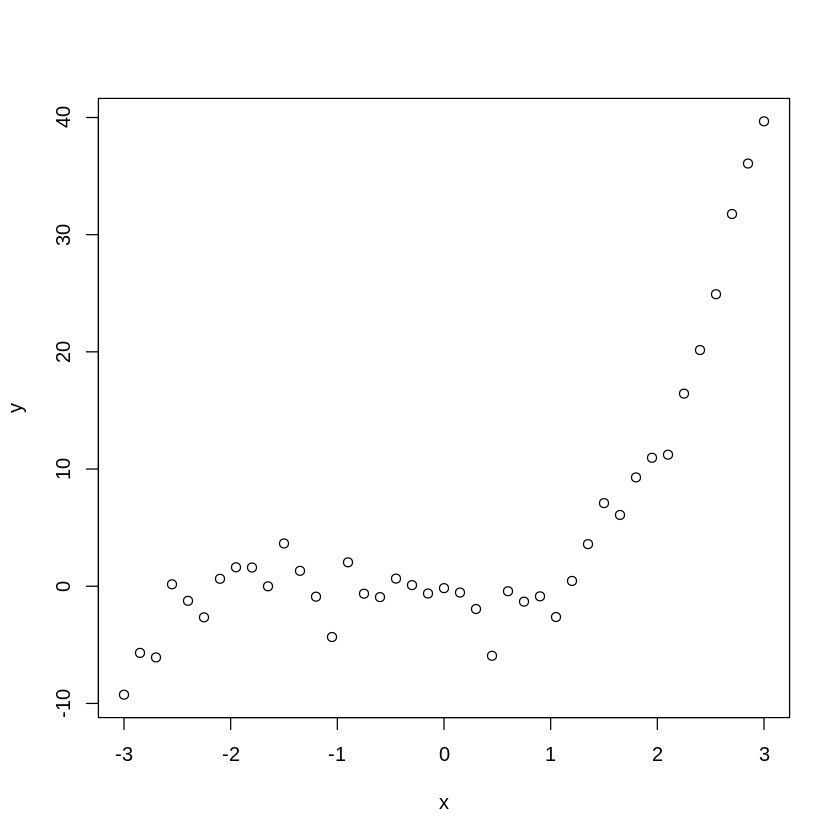

In [6]:
#::GMG::Nube de puntos del polinonio solicitado con el ruido gaussiano
set.seed(1)
x <- seq(from = -3, to = 3, by = .15)
beta <- c(-2,-1,2,1)
sigma <- 2
y <- pol(x,beta,sigma)
plot(x,y)

 3. Calcula el valor mínimo de la función de coste (_loss_, RSS) para el caso en que hacemos un ajuste con una recta (dos parámetros), una parábola (tres parámetros), 4, 5, 6 y 7 parámetros, usando los primeros 20 puntos. Con los valores que hacen mínimo el RSS para la muestra de entrenamiento, calcula el RSS para los siguientes 20 puntos. Pinta los resultados en función del número de parámetros para ambos casos.

### Función de coste

In [42]:
#::GMG::Primero definimos la función de coste (sse)
#::nota::beta es el vector de coeficientes de regresión, i.e 
#        beta_0, beta_1, ... beta_p
#        x es la "matriz de diseño"
sse <- function(beta,x,y) {
    beta.m <- as.matrix(beta)
    y.m <- as.matrix(y)
    X <- as.matrix(cbind(1,x))
    return (t(y.m - X %*% beta.m) %*% (y.m - X %*% beta.m))
}

### Train

In [13]:
#::GMG::Selecciono los "primeros 20 puntos" como "train"
x_20 <- x[1:20]
y_20 <- y[1:20]

#### Recta (dos parámetros)

In [16]:
#::GMG::Hablamos primero de una regresión lineal con intercept y slope
#       La hago primero de forma "manual": calculo los dos parámetros
#::nota::caso recta, i.e polinomio de grado 1
X <- cbind(rep(1,20), x_20)
Y <- matrix(y_20, nrow=20)
b_hat <- solve(t(X)%*%X)%*%t(X)%*%Y
b_0_hat <- b_hat[1,1]
b_1_hat <- b_hat[2,1]
p_lm <- c(b_0_hat,b_1_hat)
names(p_lm) <- c('intercept','x_20')
print(p_lm)

intercept      x_20 
 1.762206  1.771767 


In [46]:
paste('sse mínimo:', 
      round(sse(beta = p_lm, x = x_20, y = y_20),2))

[1] "sse mínimo: 141.79"

In [47]:
#::GMG::El error se reporta como MSE = SSE/(n - p)
paste('mse:', 
      round(sse(beta = p_lm, x = x_20, y = y_20)/(length(x_20) - length(p_lm)),2))

[1] "mse: 7.88"

In [32]:
#::GMG::Esto se puede hacer también con R lm()
model_1 <- lm(y_20~x_20)
model_1$coefficients

(Intercept)        x_20 
   1.762206    1.771767

In [49]:
#::GMG:: El error al utilizar least squares es de nuevo MSE =SSE/(n-p)
#::nota:: se puede sacar también con summary(model)$sigma^2
paste('mse:',
    round(
        sum(model_1$residuals^2)/(length(model_1$residuals)- length(model_1$coefficients)),2
    )
)

[1] "mse: 7.88"

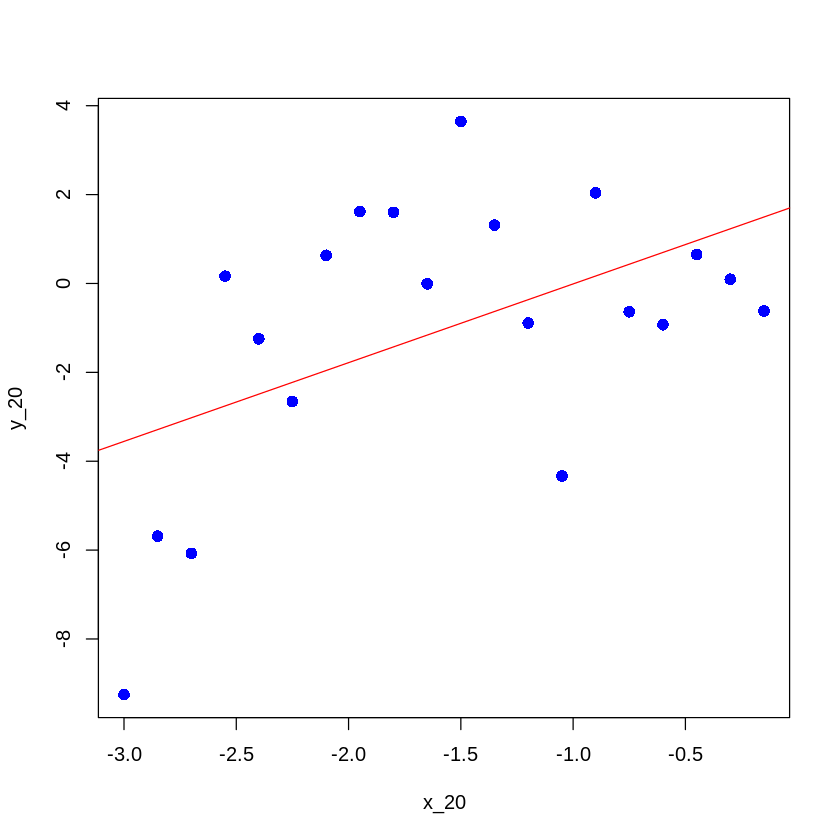

In [33]:
#::GMG::Pintamos el resultado
plot(x_20,y_20, pch = 16, cex = 1.3, col = "blue")
#abline(model_1, col = 'red')
abline(pol())

In [57]:
i <- 3
x_3 <- cbind(x_20^1,x_20^2,x_20^3)
head(x_3)

-3.00,9.0000,-27.00000
-2.85,8.1225,-23.14913
-2.70,7.2900,-19.68300
-2.55,6.5025,-16.58137
-2.40,5.7600,-13.82400
-2.25,5.0625,-11.39062


In [75]:
cbind(1, poly(x_20, 3,raw = T))

,1,2,3
1,-3.00,9.0000,-27.000000
1,-2.85,8.1225,-23.149125
1,-2.70,7.2900,-19.683000
1,-2.55,6.5025,-16.581375
1,-2.40,5.7600,-13.824000
1,-2.25,5.0625,-11.390625
1,-2.10,4.4100,-9.261000
1,-1.95,3.8025,-7.414875
1,-1.80,3.2400,-5.832000
1,-1.65,2.7225,-4.492125


In [35]:
#::GMG::Para el caso de modelos de más parámetros usamos glm()
#::nota::Esto lo vimos en la práctica de clasificación lineal de Daniel
# https://www.statmethods.net/advstats/glm.html
# https://www.rdocumentation.org/packages/stats/versions/3.5.1/topics/glm
model <- c()
mse <- c()
for (i in 1:7) {
    model[i] <- glm(y_20~poly(x = x_20,degree = i))
    mse[i] <- sum(model[i]$residuals^2)/(
                     length(model[i]$residuals) - length(model[i]$coefficients)
                     )
}

Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”Warning message in model[i] <- glm(y_20 ~ poly(x = x_20, degree = i)):
“number of items to replace is not a multiple of replacement length”

In [36]:
mse[1]

[1] NaN

In [31]:
paste('',
    round(
        sum(model_2$residuals^2)/(length(model_2$residuals)- length(model_2$coefficients)),3
    ), ' - ',
    round(
        sum(model_3$residuals^2)/(length(model_3$residuals)- length(model_3$coefficients)),3
    )
)

[1] "4.638  -  3.456"

 4. Escribe una función de R que encuentre el mínimo de la función de coste para el caso de regularización L2. El parámetro lambda será pasado como input. Utilízala para estimar las curvas que mejor ajustan para el caso de (4 parámetros, lambda = 0), (7 parámetros, lambda=0) y (7 parámetros, lambda=1000). Pinta todas las curvas juntas y escribe tus conclusiones. 

5. Utiliza la función anterior para representar el valor de los parámetros del modelo en función de $\lambda$. Prueba a representar la evolución de los coeficientes de un modelo de 11 parámetros.